In [39]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

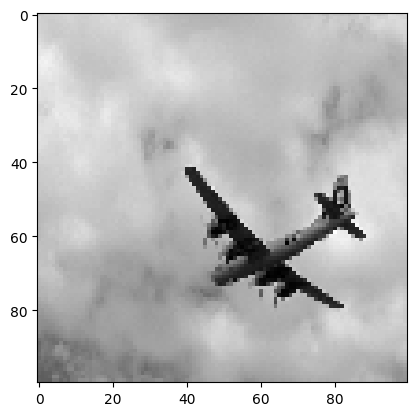

In [40]:
img = cv2.imread("imagens/3096.jpg")
img = cv2.resize(img,(100,100))
image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(image,cmap='gray')

In [41]:
point = (63, 14)
img_shape = (100,100)

In [42]:
#retorna os vizinhos de um ponto
def is_pixel_inside_image(pixel, img_shape):
	return 0<=pixel[0]<img_shape[0] and 0<=pixel[1]<img_shape[1]

def contorno_img_grow(point,img_shape):
    """
        Encontra os pixels vizinhos(pixels de contorno) do ponto de entrada. 
        Essa função é utilizada para o crescimento de regiões.
        Arguments:
            point: np.array -- Coordenadas do ponto
            img_shape: np.array -- Vetor com o tamanho da imagem
        Return:
            Contorno - np.array -- Lista com todos os vizinhos de um pixel
    """
    orientations = [(1,0),(0,1),(-1,0),(0,-1)]
    contorno = []
    for orient in orientations:
        neighbour = (point[0]+orient[0], point[1]+orient[1])
        if is_pixel_inside_image(neighbour, img_shape):
            contorno.append(neighbour)
        else:
            None
    return contorno
vizinhos_point = contorno_img_grow(point,img_shape)

def value_vizinhos(vizinhos_point,image):
    """
        Função para obter os valores de itensidades dos vizinhos de um pixel
        Arguments:
            vizinhos_point: np.array -- Coordenadas com todos os pixels que devem ter seus valores calculados na média
            image: np.array -- Uma matriz NumPy que representa a imagem
        Return:
            values_vizinhos: np.array -- Valores de itensidades dos vizinhos de um pixel
    """
    values_vizinhos = []
    for vizinho  in vizinhos_point:
        values_vizinhos.append(image[vizinho])
    return values_vizinhos

def mean_vizinhos_dos_vizinhos(vizinhos_point,img_shape):
    """
        Calcula a média dos pixels vizinhos dos viznhos 
        Arguments:
            vizinhos_point: np.array -- Coordenadas com todos os pixels que devem ter seus valores calculados na média
            img_shape: np.array -- Vetor com o tamanho da imagem
        Return:
            float -- Média dos valores de itensidade dos pixels vizinhos dos vizinhos
    """
    values_vizinhos = []
    for vizinho in vizinhos_point:
        vizinho = contorno_img_grow(vizinho,img_shape)
        values_vizinhos.append(value_vizinhos(vizinho,image))
    return np.mean(values_vizinhos)

def cresce_regiao_grow(image_grow,contorno):
    """
        Função que cresce a região de interesse da imagem, pitando os pixels que vão crescer de branco
        Arguments:
            image_grow: np.array -- Uma matriz NumPy que representa a imagem
            contorno: np.array -- Um vetor com todas as coordenadas da imagem que devem ter aumentar sua região
        Return:
            image_grow: np.array -- Uma matriz NumPy que representa a imagem com o crescimento de regiões
    """
    for ponto in contorno:
        image_grow[ponto] = 255
    return image_grow

valores_vizinhos = value_vizinhos(vizinhos_point,image)

In [43]:
#Para cada ponto
#calcular a média dos vizinhos de seus vizinhos
#comparar seu resultado com o ponto de média
# se o resultado for semelhante então crescer a região
#para crescer a região agregar o valor branco ao pixel de centro e seu contorno
#rodar o algoritimo em todos os vizinhos do ponto de semente

## adicionar a opção de média da média dos vizinhos em mean_vizinhos

In [44]:
def growth(image_grow,vizinhos,img_shape,image,pontos_analizados,limiar):
    todos_vizinhos = []
    for ponto in vizinhos:
        if(ponto not in pontos_analizados):
            pontos_analizados.append(ponto)
            vizinhos_point = contorno_img_grow(ponto,img_shape)
            valores_vizinhos = value_vizinhos(vizinhos_point,image)
            media_vizinhos = mean_vizinhos_dos_vizinhos(vizinhos_point,img_shape)
            every_points = vizinhos_point.copy()
            every_points.append(ponto)
            valor_ponto = image[ponto]
            if(abs(valor_ponto-media_vizinhos)<limiar):
                image_grow = cresce_regiao_grow(image_grow,every_points)
                todos_vizinhos.extend(vizinhos_point)
    
    return todos_vizinhos,image_grow,pontos_analizados    

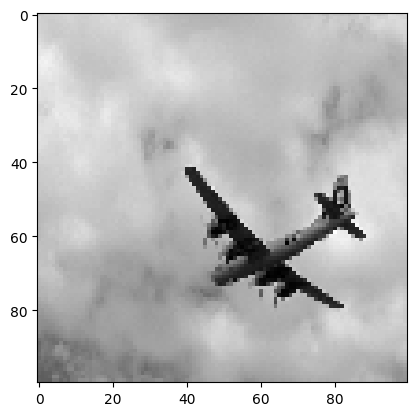

In [45]:
img = cv2.imread("imagens/3096.jpg")
img = cv2.resize(img,(100,100))
image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(image,cmap='gray')

In [46]:
def image_growth(todos_vizinhos,limiar,img_shape,image_grow):
    pontos_analizados = []
    while(todos_vizinhos):
        todos_vizinhos,image_grow,pontos_analizados  =  growth(image_grow,todos_vizinhos,img_shape,img,pontos_analizados,limiar)
    return image_grow

In [47]:
todos_vizinhos = [(50,50)]
limiar = 1.2
image_grow = image.copy()
img_shape = [100,100]
image_grow  = image_growth(todos_vizinhos,limiar,img_shape,image_grow)
#plt.imshow(np.hstack((image.copy(), image_grow)),cmap='gray')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

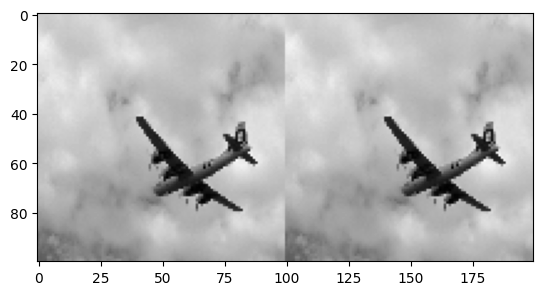

In [ ]:
todos_vizinhos = [(50,50)]
pontos_analizados = []
limiar = 6
#image_grow = np.ones((100,100))
image_grow = image.copy()
img = image.copy()
while(todos_vizinhos):
    todos_vizinhos,image_grow,pontos_analizados  =  growth(image_grow,todos_vizinhos,img_shape,img,pontos_analizados,limiar)
image_unida = np.hstack((img, image_grow))
plt.imshow(image_unida,cmap='gray')

In [ ]:
cv2.imwrite('resultados/img_gray6.png',image_unida)

True